*** 1. Random walk vs ballistic diffusion ***

*** First case: random walk motion ***

If we denote
$$
\begin{equation}
x_1(n) = x_1(0)+\sum_{i=1}^n h_i
\end{equation}
$$
where $h_i = \pm \delta$, we get,
$$
\begin{equation}
\left(x_1(n) - x_1(0)\right)^2 = \left(\sum_{i=1}^n h_i\right)^2 = \sum_{i=1}^n\sum_{j=1}^n h_ih_j = \sum_{i=1}^n h_i ^2+ \sum_{i=1}^n \sum_{j=1, j \neq i}^n h_ih_j
\end{equation}
$$
If we now take the average of these, we get,
$$
\begin{equation}
\begin{split}
\langle \left(x_1(n) - x_1(0)\right)^2 \rangle  &= \left\langle \sum_{i=1}^n h_i ^2 + \sum_{i=1}^n \sum_{j=1, j \neq i}^n h_ih_j \right\rangle = \left\langle \sum_{i=1}^n h_i ^2 \right\rangle + \left\langle \sum_{i=1}^n \sum_{j=1, j \neq i}^n h_ih_j \right\rangle = \frac{1}{N}\sum_{k=1}^N \sum_{i=1}^n h_{i,k} ^2 + \frac{1}{N}\sum_{k=1}^N\sum_{i=1}^n \sum_{j=1, j \neq i}^n h_{i,k}h_{j,k} \\ &= \sum_{i=1}^n\frac{1}{N}\sum_{k=1}^N h_{i,k} ^2 + \sum_{i=1}^n \sum_{j=1, j \neq i}^n \frac{1}{N}\sum_{k=1}^Nh_{i,k}h_{j,k} = \sum_{i=1}^n \langle h_i^2 \rangle + \sum_{i=1}^n \sum_{j=1, j \neq i}^n \langle h_ih_j \rangle
\end{split}
\end{equation}
$$

The second term in the last expression is the cross term and we have equal probabilities of positive and negative $h$. This means which means we have four equally probable, possible cases inside the sum: $(+\delta)(-\delta)$, $(-\delta)(+\delta)$, $(-\delta)(-\delta)$, $(+\delta)(+\delta)$, where the two first ones evaluates to $-\delta$, and the two last ones to $+\delta$. Hence we are only left with the first term, and we get:

$$
\begin{equation}
\begin{split}
\langle \left(x_1(n) - x_1(0)\right)^2 \rangle = \sum_{i=1}^n \langle h_i^2 \rangle = n\delta^2 = \frac{t} {\tau}\delta^2 = \frac{\delta^2}{\tau}t \Rightarrow \langle \left(x_1(n) - x_1(0)\right)^2 \rangle \propto t
\end{split}
\end{equation}
$$
*** Second case: ballistic motion ***

If we now denote
$$
\begin{equation}
x_2(n) = x_2(0)+\sum_{i=1}^n h_i
\end{equation}
$$
where $h_i = \delta$. Now we get, 

$$
\begin{equation}
\langle \left(x_2(n) - x_2(0)\right)^2 \rangle = \left \langle \left(\sum_{i=1}^n h_i\right)^2 \right \rangle = \frac{1}{N}\sum_{k=1}^N \left(\sum_{i=1}^n h_{i,k}\right)^2
\end{equation}
$$

However, now the only possible outcome inside the sum is $\delta$, which means that we get,
$$
\begin{equation}
\langle \left(x_2(n) - x_2(0)\right)^2 \rangle = \frac{1}{N}N(n \delta)^2 = (n \delta)^2 = \left ( \frac{t}{\tau}\delta \right )^2 = \left ( \frac{\delta}{\tau} \right)^2 t^2
\end{equation}
$$
and we get,

\begin{equation}
\langle \left(x_2(n) - x_2(0)\right)^2 \rangle \propto t^2
\end{equation}

*** 2. Simulations of water ***

In [1]:
# Loading packages
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
from tempfile import mkstemp
from shutil import move
from os import fdopen, remove

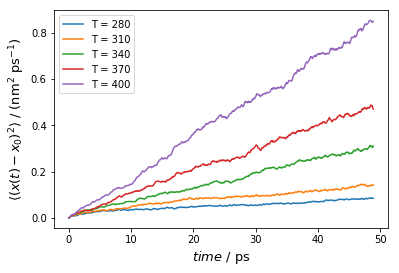

In [14]:
os.chdir('../md')

Ts = [280, 310, 340, 370, 400]
for T in Ts: # Looping over temperatures
    time = np.loadtxt("msd_T_"+str(T)+".txt", usecols=0) # Loading time array for temperature T
    msd = np.loadtxt("msd_T_"+str(T)+".txt", usecols=1) # Loading mean squared displacement for each time, averaged over all oxygens, for temperature T

    ### Plot the msd vs time
    plt.plot(time, msd, label="T = "+str(T)) # To do: fill in the empty bracket
plt.xlabel('$time$ / ps', fontsize=13) # Assigning x-axis label
plt.ylabel(r'$\langle(x(t)-x_0)^2\rangle$ / (nm$^2$ ps$^{-1})$', fontsize=13) # Assigning y-axis label
plt.legend()
plt.savefig('msd_vs_time.pdf')

In [15]:
i = 0
D = np.zeros([len(Ts)])
N = 3  # Number of dimensions (to be used in the Einstein relation)

for T in Ts: # Looping over temperatures
    time = np.loadtxt("msd_T_"+str(T)+".txt", usecols=0) # Loading time array for temperature T
    msd = np.loadtxt("msd_T_"+str(T)+".txt", usecols=1) # Loading mean squared displacement for each time, averaged over all oxygens, for temperature T
    slope, intercept, r_value, p_value, std_err = stats.linregress(time,msd)
    D[i] = slope/(N*2)*1e-2
    print("D(T="+str(T)+" K) = ", D[i])
    i = i+1


D(T=280 K) =  2.200441132962315e-06
D(T=310 K) =  4.081186788037705e-06
D(T=340 K) =  1.014255178479537e-05
D(T=370 K) =  1.624985632143972e-05
D(T=400 K) =  2.8823877474573588e-05


*** 3. Plotting and discussing diffusion as a function of temperature ***

When temperature is increased, the thermal energy is increased and plays a larger part in the total energy. Particles that at lower temperatures tend to stick to local minima to minimize the potential energy will now start to move at higher velocities and will be more prone to cross barriers in the free energy landscape, translating or rotating to new local minima. In the limit of infinite temperature, the potential energy will play a negligible part compared to the thermal energy, and particles will occupy all configurations with equal probability, $i.e.$ particles will no longer "feel" barriers in the free energy landscape.  

Text(0,0.5,'$D$ / (cm$^2$ s$^{-1}$)')

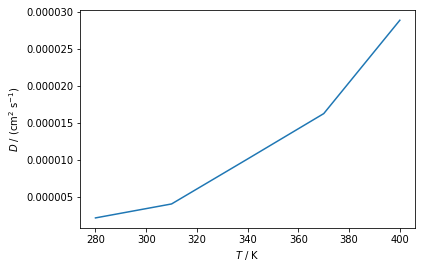

In [16]:
plt.plot(Ts, D) # Enter arguments (temperature and diffusion)
plt.xlabel('$T$ / K')
plt.ylabel('$D$ / (cm$^2$ s$^{-1}$)')